In [4]:
from process_edus import EDUSample

In [5]:
data = EDUSample()
path = r'../LabeledEDUS.txt'
dataset = []

for i in range(1, 6):
    X_train_vector, y_train, X_test_vector, y_test = \
                    data.split_vectorize(path, ngram=(1, i))
    dataset.append({
        'X_train': X_train_vector, 
        'y_train': y_train, 
        'X_test': X_test_vector, 
        'y_test': y_test
    })

=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 1)
                    X_train_vector shape: (1709, 432)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 432)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 2)
                    X_train_vector shape: (1709, 705)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 705)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 3)
                    X_train_vector shape: (1709, 763)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 763)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 4)
                    X_train_vector shape: (1709, 771)
                    y_train shape: (1709,)
                    X_test

In [6]:
data.nzp

(1322, 1577, 1242)

In [7]:
import numpy as np
import math

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC

# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Performance 
from sklearn.metrics import make_scorer, classification_report, confusion_matrix

# Visualiuzations
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#### Logistic Regression

In [8]:
lr = LogisticRegression(random_state=42)

In [9]:
PG = ParameterGrid({
    'penalty': [['l1', 'l2']],
    'C': [[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]]
})

In [10]:
grid_search = GridSearchCV(lr, PG, verbose=1)

In [11]:
list(PG)

[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}]

In [12]:
c_data = dataset[0] 
X_train, y_train, X_test, y_test = \
    c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']


grid_search.fit(X_train, y_train)

/home/heyson/.conda/envs/iitml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/heyson/.conda/envs/iitml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fc9a33e6710>,
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [13]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00929515, 0.00550397, 0.00340788, 0.0064431 , 0.0038267 ,
       0.00565489, 0.00503476, 0.00616558, 0.00655222, 0.00977429,
       0.01029483, 0.01766022, 0.03504888, 0.03592658]), 'std_fit_time': array([0.00832329, 0.00172291, 0.00093458, 0.00120844, 0.00045616,
       0.0005363 , 0.00042052, 0.00048912, 0.00124014, 0.00112734,
       0.0016696 , 0.00014886, 0.002437  , 0.00358957]), 'mean_score_time': array([0.00059628, 0.00054304, 0.00046857, 0.0006965 , 0.00065351,
       0.00056664, 0.00056203, 0.00045896, 0.00067846, 0.0006245 ,
       0.00051792, 0.00059644, 0.00053867, 0.00064945]), 'std_score_time': array([5.44002029e-05, 9.34350078e-05, 5.69300878e-05, 1.01257718e-04,
       1.06266417e-04, 4.87153720e-05, 4.08256961e-05, 9.47469154e-05,
       2.33982487e-04, 1.43377453e-04, 8.43937411e-05, 2.20003499e-05,
       1.25048114e-04, 1.81647213e-05]), 'param_C': masked_array(data=[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1,
                 

In [14]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
preds = grid_search.best_estimator_.predict(X_test)

Text(89.18, 0.5, 'predicted label')

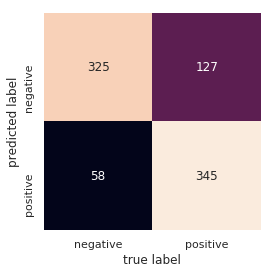

In [16]:
mat = confusion_matrix(preds, y_test)
    
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])

plt.xlabel('true label')
plt.ylabel('predicted label')

In [17]:
grid_search.best_estimator_.score(X_test, y_test)

0.783625730994152

In [18]:
 # .score(X_test, y_test)

#### l1 penalty

In [19]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
preds, acc = [], [] 
for ngram in range(5):
    print('==========> NGRAM RANGE ( 1 ,', ngram+1, ')')
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    p, a = [], []
    for c in C:
        lr1 = LogisticRegression(penalty='l1',
                                 C=c, random_state=42,
                                 solver='liblinear')
        
        lr1.fit(X_train, y_train)

        p.append(lr1.predict(X_test))
        a.append(lr1.score(X_test, y_test))
        
    preds.append(p); acc.append(a)

==========> NGRAM RANGE ( 1 , 1 )
==========> NGRAM RANGE ( 1 , 2 )
==========> NGRAM RANGE ( 1 , 3 )
==========> NGRAM RANGE ( 1 , 4 )
==========> NGRAM RANGE ( 1 , 5 )


plot accuracies

In [32]:
acc
#max(acc[0])

[[0.5286549707602339,
  0.5286549707602339,
  0.6374269005847953,
  0.783625730994152,
  0.7578947368421053,
  0.7415204678362574,
  0.7403508771929824],
 [0.5286549707602339,
  0.5286549707602339,
  0.639766081871345,
  0.7988304093567251,
  0.7380116959064328,
  0.7099415204678362,
  0.7052631578947368],
 [0.5286549707602339,
  0.5286549707602339,
  0.639766081871345,
  0.7964912280701755,
  0.7508771929824561,
  0.7052631578947368,
  0.7005847953216374],
 [0.5286549707602339,
  0.5286549707602339,
  0.639766081871345,
  0.7964912280701755,
  0.752046783625731,
  0.7157894736842105,
  0.7017543859649122],
 [0.5286549707602339,
  0.5286549707602339,
  0.639766081871345,
  0.7964912280701755,
  0.752046783625731,
  0.7169590643274854,
  0.6982456140350877]]

#### l2 penalty

In [20]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
preds2, acc2 = [], [] 

for ngram in range(5):
    print('==========> NGRAM RANGE ( 1 ,', ngram+1, ')')
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    p, a = [], []
    for c in C:
        lr1 = LogisticRegression(penalty='l2',
                                 C=c, random_state=42,
                                 solver='liblinear')
        
        lr1.fit(X_train, y_train)

        p.append(lr1.predict(X_test))
        a.append(lr1.score(X_test, y_test))
        
    preds2.append(p); acc2.append(a)

==========> NGRAM RANGE ( 1 , 1 )
==========> NGRAM RANGE ( 1 , 2 )
==========> NGRAM RANGE ( 1 , 3 )
==========> NGRAM RANGE ( 1 , 4 )
==========> NGRAM RANGE ( 1 , 5 )


plot accuracies

In [28]:
acc2

[[0.6385964912280702,
  0.6818713450292397,
  0.752046783625731,
  0.7789473684210526,
  0.7602339181286549,
  0.743859649122807,
  0.7380116959064328],
 [0.6374269005847953,
  0.6678362573099416,
  0.7543859649122807,
  0.7730994152046784,
  0.7415204678362574,
  0.7263157894736842,
  0.7134502923976608],
 [0.6374269005847953,
  0.6619883040935672,
  0.7532163742690059,
  0.7789473684210526,
  0.7543859649122807,
  0.7274853801169591,
  0.7181286549707603],
 [0.6374269005847953,
  0.6631578947368421,
  0.7532163742690059,
  0.7789473684210526,
  0.7567251461988304,
  0.7263157894736842,
  0.7204678362573099],
 [0.6374269005847953,
  0.6631578947368421,
  0.7532163742690059,
  0.7789473684210526,
  0.7567251461988304,
  0.7263157894736842,
  0.7204678362573099]]

In [21]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
[math.log10(c) for c in C]

[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0]

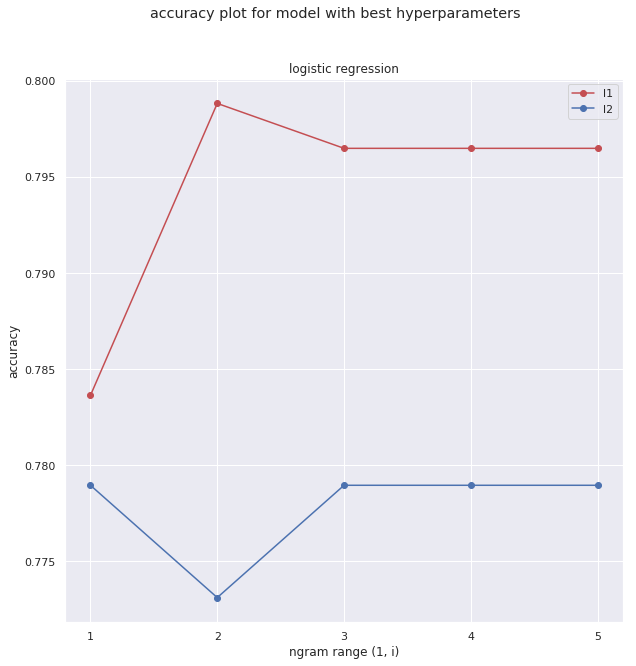

In [42]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('accuracy plot for model with best hyperparameters')
ax = plt.subplot(111)
ax.set_title('logistic regression')
x = list(range(1,6)) # use later: list(range(1, len(C) + 1)), acc2[:,1]) for i in range(len(acc2)
acc = np.array(acc)
acc2 = np.array(acc2)

ax.plot(x, [max(a) for a in acc], 'ro-', label='l1')
ax.plot(x, [max(a) for a in acc2], 'bo-', label='l2')

ax.legend()

plt.xlabel('ngram range (1, i)')
plt.xticks(x)
plt.ylabel('accuracy')
plt.show()

fig.savefig('lr_accuracy_plot.png')

In [31]:
for i in range (len)
    np.array(acc)[:,0]

array([0.52865497, 0.52865497, 0.52865497, 0.52865497, 0.52865497])